In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import recall_score, precision_score


df = pd.read_csv('E:/Datasets/Eckovation_statistical_Arbitage/nse_data.csv')
data = []

for index, rows in df.iterrows():
    if rows[0] == '20MICRONS':
        data.append(list(rows))

stocks = pd.DataFrame(data, columns = df.columns)
#stocks.to_csv('20microns.csv', sep=',')

In [8]:
#stocks = pd.read_csv('20microns.csv')
stocks

,Unnamed: 0,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,9.946579e+05,2017-06-28,202,INE144J01027
1,1,20MICRONS,EQ,52.90,61.70,52.90,59.40,59.65,52.80,2489935,1.481265e+08,2017-11-28,14196,INE144J01027
2,2,20MICRONS,EQ,36.15,36.30,35.60,36.05,36.00,35.65,40594,1.461975e+06,2017-02-28,193,INE144J01027
3,3,20MICRONS,EQ,44.35,44.80,43.55,43.90,43.60,44.80,90170,3.984352e+06,2017-04-28,597,INE144J01027
4,4,20MICRONS,EQ,36.00,36.75,34.20,34.90,34.90,35.40,77310,2.709788e+06,2017-03-20,413,INE144J01027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,490,20MICRONS,EQ,28.45,28.45,27.70,28.30,28.20,28.05,8045,2.263841e+05,2016-06-08,100,INE144J01027
491,491,20MICRONS,EQ,28.45,28.45,26.90,27.60,27.65,27.60,17151,4.718833e+05,2016-03-15,179,INE144J01027
492,492,20MICRONS,EQ,32.40,33.50,31.60,32.40,32.15,32.75,17422,5.712948e+05,2016-04-08,203,INE144J01027
493,493,20MICRONS,EQ,38.10,39.60,37.85,38.30,38.50,38.95,135931,5.229043e+06,2016-09-23,877,INE144J01027


In [3]:
start16 = datetime(2016, 1, 1)
end16 = datetime(2016, 12, 31)
stamp16 = pd.date_range(start16, end16)

start17 = datetime(2017, 1, 1)
end17 = datetime(2017, 12, 31)
stamp17 = pd.date_range(start17, end17)

stocks['Date'] = pd.to_datetime(stocks.TIMESTAMP,format='%Y-%m-%d')
stocks.index = stocks['Date']
stocks

,Unnamed: 0,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,Date
Date,,,,,,,,,,,,,,,
2017-06-28,0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,9.946579e+05,2017-06-28,202,INE144J01027,2017-06-28
2017-11-28,1,20MICRONS,EQ,52.90,61.70,52.90,59.40,59.65,52.80,2489935,1.481265e+08,2017-11-28,14196,INE144J01027,2017-11-28
2017-02-28,2,20MICRONS,EQ,36.15,36.30,35.60,36.05,36.00,35.65,40594,1.461975e+06,2017-02-28,193,INE144J01027,2017-02-28
2017-04-28,3,20MICRONS,EQ,44.35,44.80,43.55,43.90,43.60,44.80,90170,3.984352e+06,2017-04-28,597,INE144J01027,2017-04-28
2017-03-20,4,20MICRONS,EQ,36.00,36.75,34.20,34.90,34.90,35.40,77310,2.709788e+06,2017-03-20,413,INE144J01027,2017-03-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-08,490,20MICRONS,EQ,28.45,28.45,27.70,28.30,28.20,28.05,8045,2.263841e+05,2016-06-08,100,INE144J01027,2016-06-08
2016-03-15,491,20MICRONS,EQ,28.45,28.45,26.90,27.60,27.65,27.60,17151,4.718833e+05,2016-03-15,179,INE144J01027,2016-03-15
2016-04-08,492,20MICRONS,EQ,32.40,33.50,31.60,32.40,32.15,32.75,17422,5.712948e+05,2016-04-08,203,INE144J01027,2016-04-08


In [4]:
stocks = stocks[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'TOTTRDQTY', 'Date', 'PREVCLOSE', 'TOTTRDVAL', 'TOTALTRADES']]
stocks.index = stocks['Date']
stocks

,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,Date,PREVCLOSE,TOTTRDVAL,TOTALTRADES
Date,,,,,,,,,
2017-06-28,37.80,37.80,36.15,36.85,27130,2017-06-28,37.05,9.946579e+05,202
2017-11-28,52.90,61.70,52.90,59.40,2489935,2017-11-28,52.80,1.481265e+08,14196
2017-02-28,36.15,36.30,35.60,36.05,40594,2017-02-28,35.65,1.461975e+06,193
2017-04-28,44.35,44.80,43.55,43.90,90170,2017-04-28,44.80,3.984352e+06,597
2017-03-20,36.00,36.75,34.20,34.90,77310,2017-03-20,35.40,2.709788e+06,413
...,...,...,...,...,...,...,...,...,...
2016-06-08,28.45,28.45,27.70,28.30,8045,2016-06-08,28.05,2.263841e+05,100
2016-03-15,28.45,28.45,26.90,27.60,17151,2016-03-15,27.60,4.718833e+05,179
2016-04-08,32.40,33.50,31.60,32.40,17422,2016-04-08,32.75,5.712948e+05,203


In [5]:
train = []
test = []

for index, rows in stocks.iterrows():
    if index in stamp16:
        train.append(list(rows))
    if index in stamp17:
        test.append(list(rows))

train = pd.DataFrame(train, columns = stocks.columns)
test = pd.DataFrame(test, columns = stocks.columns)

In [6]:
X_train = train[['HIGH', 'LOW', 'OPEN', 'TOTTRDQTY', 'TOTTRDVAL', 'TOTALTRADES']]
x_train = X_train.to_dict(orient='records')
vec = DictVectorizer()
X = vec.fit_transform(x_train).toarray()
Y = np.asarray(train.CLOSE)
Y = Y.astype('int')

Accuracy of model is:  0.9628088246357632


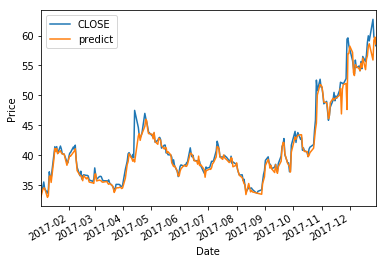

In [7]:
X_test = test[['HIGH', 'LOW', 'OPEN', 'TOTTRDQTY', 'TOTTRDVAL', 'TOTALTRADES']]
x_test = X_test.to_dict(orient='records')
vec = DictVectorizer()
x = vec.fit_transform(x_test).toarray()
y = np.asarray(test.CLOSE)
y = y.astype('int')


#Classifier

clf = LinearRegression()
clf.fit(X, Y) 

print("Accuracy of model is: ",clf.score(x,y))
predict = clf.predict(x)
test['predict'] = predict


#Ploting 

test.index = test.Date
test['CLOSE'].plot()
test['predict'].plot()
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()